In [1]:
from model import PHNNModel
from data import simple_experiment, dim_bias_scale
import torch
import numpy as np
from utils import sample_initial_states, forecast
import matplotlib.pyplot as plt

In [2]:
model = PHNNModel(3, 64, J="matmul", R="matmul", grad_H="gradient")
model.load_state_dict(torch.load('model_inductor.pt'))
model.eval()
problem = "inductor"
DIM, scale, bias = dim_bias_scale(problem)
time = 10
steps = 1000
dt = time / steps

generator_val = simple_experiment(problem, time, steps)
X = sample_initial_states(200, DIM, {"identifies": "uniform", "low": -1, "high": 1, "seed": 0, "scale": scale, "bias": bias})

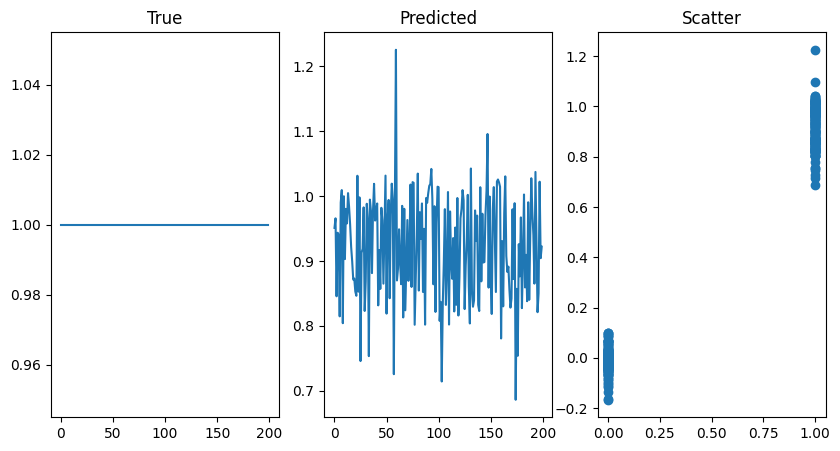

0.043089760753015675


In [3]:
G_true = np.stack([generator_val.G(x) for x in X], axis=0)
G_pred = model.G(torch.tensor(X, dtype=torch.float32)).detach().numpy()
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].plot(G_true[:, 2])
ax[0].set_title("True")
ax[1].plot(G_pred[:, 2])
ax[1].set_title("Predicted")
ax[2].scatter(G_true.reshape(-1), G_pred.reshape(-1))
ax[2].set_title("Scatter")
plt.show()
print(np.mean(np.abs(G_true - G_pred)))

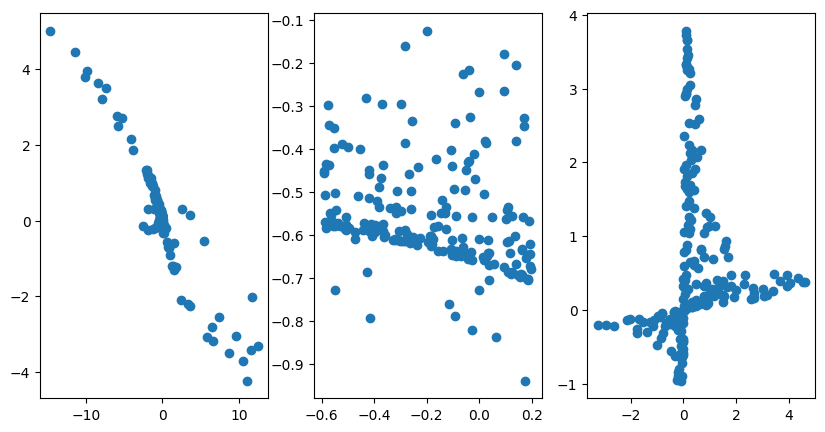

In [4]:
H_true = np.stack([generator_val.grad_H(x) for x in X], axis=0)
H_pred = model.grad_H(torch.tensor(X, dtype=torch.float32)).detach().numpy()
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].scatter(H_true[:, 0], H_pred[:, 0])
ax[1].scatter(H_true[:, 1], H_pred[:, 1])
ax[2].scatter(H_true[:, 2], H_pred[:, 2])

In [5]:
model = PHNNModel(4, 64, J="sigmoid", R="sigmoid", grad_H="gradient")
model.load_state_dict(torch.load('model_spring.pt'))
model.eval()
problem = "spring"
DIM, scale, bias = dim_bias_scale(problem)
time = 100
steps = 10000
dt = time / steps

generator_val = simple_experiment(problem, time, steps)
X = sample_initial_states(200, DIM, {"identifies": "uniform", "low": -1, "high": 1, "seed": 0, "scale": scale, "bias": bias})

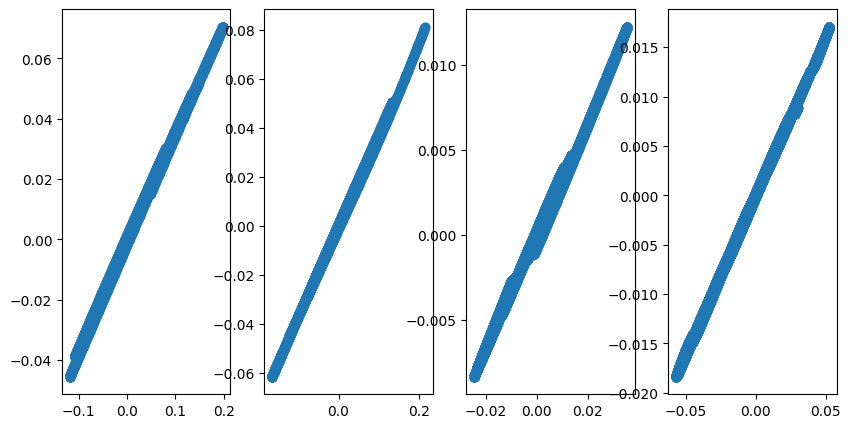

In [8]:
H_true = np.stack([generator_val.grad_H(x) for x in X], axis=0)
H_pred = model.grad_H(torch.tensor(X, dtype=torch.float32)).detach().numpy()
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
ax[0].scatter(H_true[:, 0], H_pred[:, 0])
ax[1].scatter(H_true[:, 1], H_pred[:, 1])
ax[2].scatter(H_true[:, 2], H_pred[:, 2])
ax[3].scatter(H_true[:, 3], H_pred[:, 3])

Generating trajectories


100%|██████████| 1/1 [00:00<00:00, 75.40it/s]


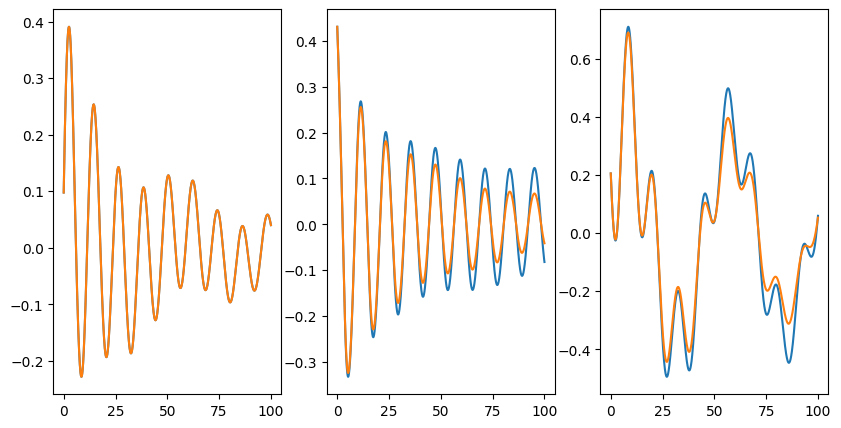

In [9]:
X0 = sample_initial_states(1, DIM, {"identifies": "uniform", "low": -1, "high": 1, "seed": 0, "scale": scale, "bias": bias})
X = generator_val.get_data(X0)[-1][0][0]
N = 10000
with torch.no_grad():
    X_pred = forecast(model, torch.tensor(X0), 0, .01, N)[0]
    t = np.linspace(0, N * .01, N)
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
X_pred = X_pred.detach().numpy()
ax[0].plot(t, X_pred[:, 0])
ax[0].plot(t, X_pred[:, 0])
ax[1].plot(t, X[:, 1])
ax[1].plot(t, X_pred[:, 1])
ax[2].plot(t, X[:, 2])
ax[2].plot(t, X_pred[:, 2])
